In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,desc

In [ ]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [ ]:
# View all of the classes that automap found
Base.classes.keys()

In [ ]:
# Save references to each table
Station =Base.classes.station
Measurement = Base.classes.measurement

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.

most_recent_date= session.query(Measurement.date).order_by(desc(Measurement.date)).first()
most_recent_date


('2017-08-23',)

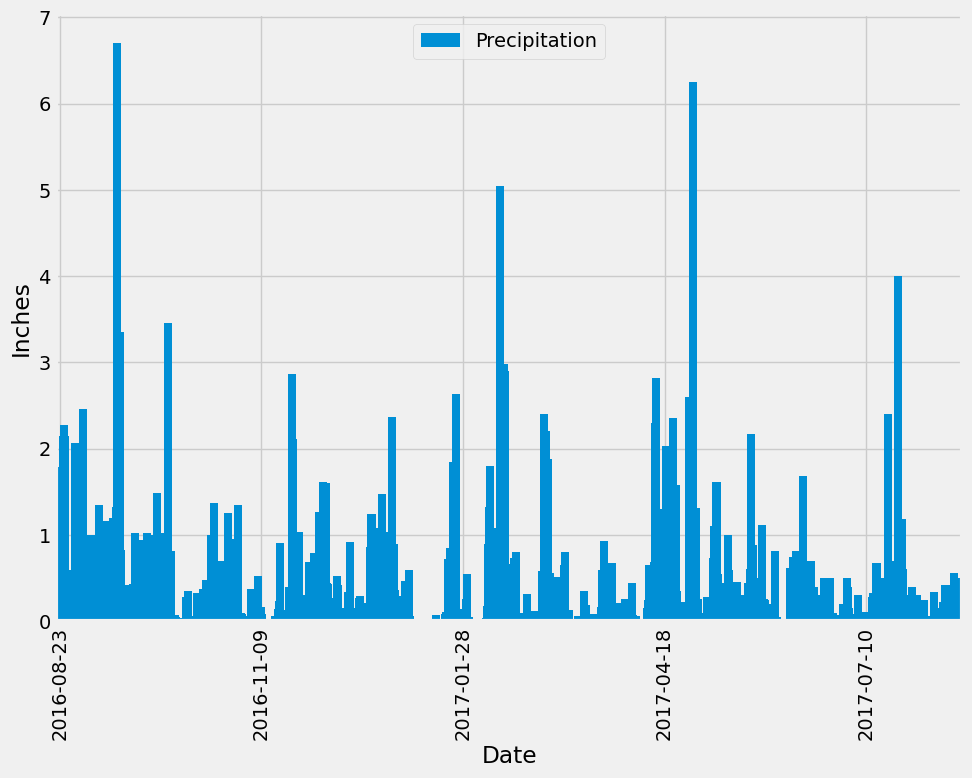

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

most_recent_date_string = most_recent_date[0]
most_recent_date_obj = dt.datetime.strptime(most_recent_date_string, '%Y-%m-%d').date()
one_year_before_date = most_recent_date_obj - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data= session.query(Measurement.prcp,Measurement.date).\
    filter(Measurement.date >= one_year_before_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_data_df = pd.DataFrame(precipitation_data)
precipitation_data_df.columns=['Precipitation','Date']

# # Sort the dataframe by date
sorted_df = precipitation_data_df.sort_values('Date',ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(kind="bar", x="Date", y="Precipitation", figsize=(10,8),grid = True,width= 20.0)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.legend(loc="upper center")

step = 500
plt.xticks(range(0, len(sorted_df), step), sorted_df["Date"].iloc[::step], rotation=90)

plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
number_station= session.query(Measurement.station).group_by(Measurement.station).count()
number_station

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = (
    session.query(Measurement.station, func.count(Measurement.station).label('count'))
    .group_by(Measurement.station)
    .order_by(desc('count'))
    .all()
)

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)).\
        filter(Measurement.station == "USC00519281").all()
print(temperatures)

[(54.0, 85.0, 71.66378066378067)]


In [34]:
#finding the most ative station
active_station = session.query(Measurement.station).\
group_by(Measurement.station).\
order_by(desc(func.count(Measurement.station))).first()

#Query the dates and temperature observations for that station for last year
temp = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= one_year_before_date).\
filter(Measurement.station==active_station[0]).all()
temp

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

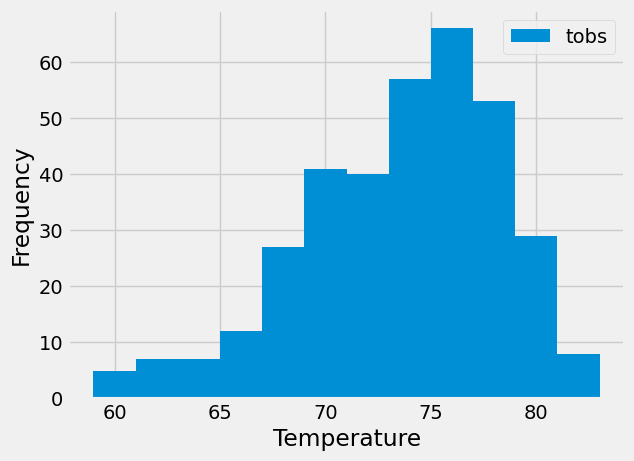

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs).\
    filter (Measurement.station == "USC00519281").\
    filter(Measurement.date >= one_year_before_date).all()

temps_df = pd.DataFrame(temps)

temps_df['tobs'].hist(bins =12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"],loc ="best")


# Close Session

In [ ]:
# Close Session
session.close()